# Classical Pipeline-based ML

Amazon rating classification

In [39]:
!nvidia-smi

Fri Mar 24 13:05:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    26W /  70W |    363MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [40]:
#Update Spacy for 3.0 functionality (new features), install GPU support for better performance
!pip install -U pip setuptools wheel
!pip install --upgrade 'spacy[cuda120]'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
!python -m spacy download en_core_web_sm

2023-03-24 13:06:29.116617: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-24 13:06:29.116770: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-24 13:06:29.116796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.1 MB/s

In [42]:
import spacy
import pandas as pd

# Using Pandas and Sklearn for NLP-based classification

Download Dataset

In [43]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

#Download a larger text corpus
def download_from_drive(link, filename):
  id = link.split("/")[-2]
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={id}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={id}" -O {"/content/"+filename} && rm -rf /tmp/cookies.txt

download_from_drive("https://drive.google.com/file/d/1abJU_E85xrSSFfchUvrODOuWyJ_1AHeR/view?usp=sharing", "amazon_alexa.tsv")

--2023-03-24 13:07:32--  https://docs.google.com/uc?export=download&confirm=&id=1abJU_E85xrSSFfchUvrODOuWyJ_1AHeR
Resolving docs.google.com (docs.google.com)... 108.177.119.100, 108.177.119.113, 108.177.119.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/08k1rml2rv8ag117fdsav6eguc0fvpmo/1679663250000/08371275558726478285/*/1abJU_E85xrSSFfchUvrODOuWyJ_1AHeR?e=download&uuid=c094489d-b899-4dad-8614-c0d9f9c3977e [following]
--2023-03-24 13:07:32--  https://doc-00-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/08k1rml2rv8ag117fdsav6eguc0fvpmo/1679663250000/08371275558726478285/*/1abJU_E85xrSSFfchUvrODOuWyJ_1AHeR?e=download&uuid=c094489d-b899-4dad-8614-c0d9f9c3977e
Resolving doc-00-3s-docs.googleusercontent.com (doc-00-3s-docs.googleusercontent.com)... 142.251.31.13

Parse to pandas

In [44]:
df = pd.read_csv("amazon_alexa.tsv", sep='\t')

In [45]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [47]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [48]:
df.groupby("rating").describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

Load pipeline! We don't need NER and DEP parsing

In [49]:
nlp = spacy.load("en_core_web_sm", disable=["ner","parser"])

Define additional columns

In [50]:
df["length"] = df["verified_reviews"].apply(len)

In [51]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [52]:
import matplotlib.pyplot as plt

%matplotlib inline

<Axes: >

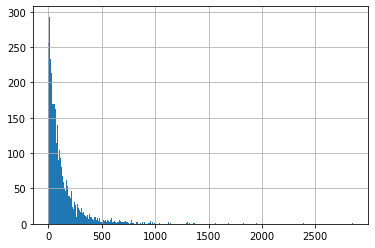

In [53]:
df.length.hist(bins=300)

In [54]:
df.length.describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: >]], dtype=object)

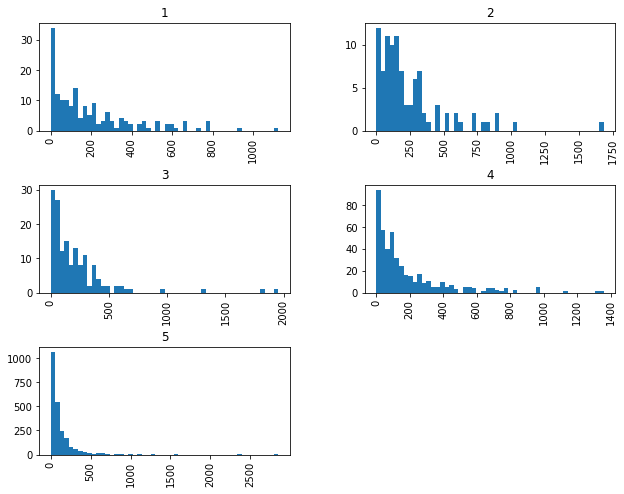

In [55]:
df.hist(column="length", by="rating", bins=50, figsize=(10,8))

Run our pipeline by with batched processing (not line-by-line with df.apply)

In [57]:
# Input: A list of strings
doc_list = nlp.pipe(df.verified_reviews.to_list())

# We want to obtain a list of tokens for each string --> list[list[spacy.Doc]]
tokens = []

for doc in doc_list:
  token_list = []
  for token in doc:
    token_list.append(token)
  tokens.append(token_list)

df['tokens'] = tokens

In [58]:
df.head(5)

,rating,date,variation,verified_reviews,feedback,length,tokens
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,"[Love, my, Echo, !]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,"[Loved, it, !]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,"[Sometimes, while, playing, a, game, ,, you, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,"[I, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,[Music]


Let's clean the tokens by removing punctuations, stopwords, lemmatizing and transforming to lower case. 

Warning for older Spacy versions: *One of spaCy's quirks, is that it lemmatizes pronouns to a placeholder token `"-PRON-"`. We used some if-statement logic to avoid this behaviour.*

In [59]:
def clean_text(tokens):
  cleaned_tokens = []

  for token in tokens:
    if not token.is_stop and token.pos_ != "PUNCT":
      if token.lemma_ != "-PRON-":
        cleaned_tokens.append(token.lemma_.lower().strip())
      else:
        cleaned_tokens.append(token.lower_.strip())
    else:
      pass

  return cleaned_tokens

In [60]:
df["cleaned tokens"] = df["tokens"].apply(clean_text)

In [61]:
df.head(5)

,rating,date,variation,verified_reviews,feedback,length,tokens,cleaned tokens
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,"[Love, my, Echo, !]","[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,"[Loved, it, !]",[love]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,"[Sometimes, while, playing, a, game, ,, you, c...","[play, game, answer, question, correctly, alex..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,"[I, have, had, a, lot, of, fun, with, this, th...","[lot, fun, thing, 4, yr, old, learn, dinosaur,..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,[Music],[music]


Vectorize our tokens!
1. By Count-based BOW

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

def dummy(doc):
  return doc

vectorizer = CountVectorizer(analyzer="word", tokenizer=dummy, preprocessor=dummy, token_pattern=None)

Dummy is needed because we have already done our tokenizing and preprocessing steps, so we just want an identity transformation there.

In [63]:
x_train = vectorizer.fit_transform(df_train["cleaned tokens"])
y_train = df_train["rating"].to_numpy()
x_test = vectorizer.transform(df_test["cleaned tokens"])
y_test = df_test["rating"].to_numpy()

In [64]:
x_train

<2520x2986 sparse matrix of type '<class 'numpy.int64'>'
	with 26223 stored elements in Compressed Sparse Row format>

A simple discriminative logistic regression model:

In [65]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()

logreg_model.fit(x_train, y_train);

It's pretty straightforward to get back the prediction of our model based on what it has learned: just call the *predict* function on a given input x. 
Note: call it on your *x_test*!

Let's see our model's accuracy. It is the most commonly used metric.
As our dataset is highly inbalanced we should get [balanced accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) too.

In [66]:
from sklearn.metrics import balanced_accuracy_score

y_pred = logreg_model.predict(x_test)
print(round(logreg_model.score(x_test, y_test), 3))

balanced_accuracy_score(y_test, y_pred)

0.795


0.4936175213675213

Let's plot the confusion matrix. It should be diagonal for a perfect classifier.

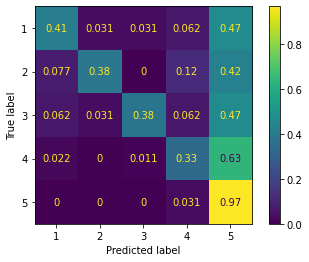

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

cnf = ConfusionMatrixDisplay.from_estimator(logreg_model, x_test, y_test, normalize="true")

Try your ideas for dealing with:
- Vectorization
- Non-linear classification
- Imbalanced data

## Example:
- Using TF-IDF with class_weighted Random Forest classifier

In [ ]:
"""

"A", "fox", "ate", "plum", "jumped", "high"

"A fox ate plum"
"A fox jumped high"

# Count vectors (BOW):
[1 1 1 1 0 0]
[1 1 0 0 1 1]

# (N+1)/(df+1) -> idf:
[1 1 1.5 1.5 1.5 1.5]

# IDF
[0 0 0.4 0.4 0.4 0.4]

#TF-IDF
[0  0  0.4 0.4  0   0]
[0  0   0   0  0.4 0.4]

# TF-IDF Term-frequency-inverse document frequency
# tf * log((N+1)/(df+1))

"""

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [70]:
vectorizer_tfidf = TfidfVectorizer(analyzer="word", tokenizer=dummy, preprocessor=dummy, token_pattern=None, norm="l2")

x_train_tfidf = vectorizer_tfidf.fit_transform(df_train["cleaned tokens"])
y_train_tfidf = df_train["rating"].to_numpy()
x_test_tfidf = vectorizer_tfidf.transform(df_test["cleaned tokens"])
y_test_tfidf = df_test["rating"].to_numpy()

In [71]:
import numpy as np
cls, cnt = np.unique(y_train_tfidf, return_counts = True)

# f = N_class / N_all
# cw = 1/f = N_all / N_class

cw = ((cnt.sum()/(cnt+1))/len(cnt))

weight_dict = dict(zip(cls, cw))

In [72]:
weight_dict

{1: 3.8769230769230765,
 2: 7.098591549295774,
 3: 4.1652892561983474,
 4: 1.3770491803278688,
 5: 0.2743603701687534}

In [73]:
rndf_model = RandomForestClassifier(class_weight=weight_dict)

rndf_model.fit(x_train_tfidf.toarray(), y_train_tfidf);

y_pred_rndf = rndf_model.predict(x_test_tfidf.toarray())
print(round(rndf_model.score(x_test_tfidf.toarray(), y_test_tfidf), 3))

balanced_accuracy_score(y_test_tfidf, y_pred_rndf)

0.798


0.5221175213675213

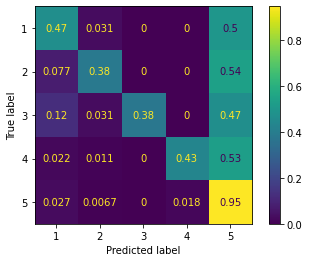

In [74]:
cnf = ConfusionMatrixDisplay.from_estimator(rndf_model, x_test_tfidf, y_test_tfidf, normalize="true")